In [3]:
import pandas as pd
import numpy as np
from fastai.tabular import *

In [4]:
data = pd.read_csv('dummy_creation_ss.csv')

In [5]:
data.head()

,Uniq Id,Package Type,Flight Stops,Meals,Cancellation Rules,Per Person Price,not available,dal lake,avantipura ruins,mughal gardens,...,turkish airlines,brussels airlines,cathay pacific,air austral,south african airways,ethiopian airlines,sichuan airlines,Travel Year,Travel Month,Week_filter
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Standard,2,3,Not Available,11509.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Jul,forth Week
1,178f892630ce3e335a5a41d5d83937fd,Premium,0,5,Cancellation any time after making the 1st pay...,22485.5,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Dec,First Week
2,f060f2954840503cc2fdaf495357b7df,Luxury,0,4,Cancellation any time after making the 1st pay...,12421.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Apr,forth Week
3,32a19a6c171e67448f2346da46c619dc,Premium,0,5,Cancellation any time after making the 1st pay...,35967.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Aug,forth Week
4,107b068aa0ca03bc6248966f594d105f,Premium,0,5,Cancellation any time after making the 1st pay...,25584.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Dec,Second Week


In [6]:
dummies = pd.get_dummies(data['Travel Year']).rename(columns=lambda x: 'Category_' + str(x))
# df = pd.concat([df, dummies], axis=1)
# df = df.drop(['Category'], inplace=True, axis=1)

data = pd.concat([data, dummies], axis=1)

del data['Travel Year']

In [7]:
dummies1 = pd.get_dummies(data['Travel Month']).rename(columns=lambda x: 'Category_' + str(x))
dummies1.shape

data = pd.concat([data, dummies1], axis=1)
data.shape

del data['Travel Month']

In [8]:
dummies2 = pd.get_dummies(data['Week_filter']).rename(columns=lambda x: 'Category_' + str(x))
dummies2.shape

data = pd.concat([data, dummies2], axis=1)
data.shape

del data['Week_filter']

In [9]:
dummies3 = pd.get_dummies(data['Cancellation Rules']).rename(columns=lambda x: 'Category_' + str(x))
dummies3.shape

data = pd.concat([data, dummies3], axis=1)
data.shape

del data['Cancellation Rules']

In [10]:
dummies4 = pd.get_dummies(data['Package Type']).rename(columns=lambda x: 'Category_' + str(x))
dummies4.shape

data = pd.concat([data, dummies4], axis=1)
data.shape

del data['Package Type']

In [11]:
del data['Uniq Id']

In [12]:
#The dependent variable/target
dep_var = "Per Person Price"

In [13]:
data.head()

,Flight Stops,Meals,Per Person Price,not available,dal lake,avantipura ruins,mughal gardens,cheshma shahi,nishat bagh,shalimar garden,...,Category_Not Available,Category_Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve,"Category_Packages will be escorted by Local Representative of the Vendor on the day of Full or Half day tours as per itinerary.Vendor Representative are English speaking & Explain about the Tours in English Language Only. Package has the flexibility to add extra Nights before start of the Tour and at the end of the tour. Please contact MMT representative.Package has the flexibility to add extra Optional tours within the itinerary subject to time availability in each Package. Please contact MMT representative.Price of the Holiday Services are calculated per passenger on twin-sharing basis.The taxes mentioned are taxes as applicable on September 1st, 2017. In the event of increase in the rate of taxation, the differential amount will be payable by the customer. A surcharge may be applicable for certain departures.Service tax charges will apply, as applicable.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fees at hotels, airports and seaports is not included in the Holiday Services and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned in the Inclusions list are not included in the cost of the Holiday Services.Prices are dynamic and based on offers running at the time of booking. MMT reserves the right to change prices at any time.In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in a hotel of similar category.Due to operational reasons, the routing of this holiday may be amended. However, all mentioned services will remain unchanged.Pricing of the Holiday Services is based on the age of the passengers. Please make sure you enter it correctly at the time of booking. Furnishing wrong passenger age may incur penalty at a later stage.","Category_Price of the booking is calculated for per passenger on a twin-sharing basis. Prices are dynamic and may be based on offers running at the time of booking. MMT reserves the right to change prices at any time.Pricing of the booking is based on the age of the passengers. Please make sure you enter the correct age of passengers at the time of booking. Passengers furnishing incorrect age details may incur penalty at the time of travelling.A surcharge may be applicable for certain departures. In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in another hotel of a similar category.Due to operational reasons, the routing of this tour may be amended. However, all mentioned services will remain unchanged.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fee at hotels, airports and seaports is not included in the package and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned under ?Inclusions? are not included in the cost of the booking.Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve","Category_This cancellation policy is applicable for bookings made for Weekend Getaways through the MakeMyTrip platform If the booking is made 15 days prior to the travel date (i.e. the date on which the customer is travelling): When the customer has booked a weekend getaway 15 days (inclusive of the travel date) prior to the travel date, the customer is eligible to avail the benefit of this offer.At the time of making the payment while booking the package, the customer shall have the option of either paying in t

In [13]:
path = ""

In [14]:
#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names= ["Flight Stops", "Meals", "Airline_count"]

In [15]:
#The list of categorical features in the dataset
cat_names= data.columns.values.tolist()

In [16]:
len(cat_names)

1228

In [17]:
cat_names.remove('Airline_count')

In [18]:
cat_names.remove('Meals')

In [19]:
cat_names.remove('Flight Stops')

In [20]:
len(cat_names)

1225

In [21]:
#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]

In [22]:
train_data = data
#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

In [23]:
#End index for creating a validation set from train_data
end_indx = len(train_data)

In [24]:
#Defining the keyword arguments for fastai's TabularList

#Path / default location for saving/loading models
path = 'C:\\Users\\Sumit\\Desktop\\Hackathon\\Participant_Data_WPPH\\Participant_Data_WPPH'

In [25]:
test_data = pd.read_csv("dummy_creation_ss_test.csv")

In [ ]:
#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))

test = (TabularList.from_df(test_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
data.head()

,Flight Stops,Meals,Per Person Price,not available,dal lake,avantipura ruins,mughal gardens,cheshma shahi,nishat bagh,shalimar garden,...,Category_Not Available,Category_Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve,"Category_Packages will be escorted by Local Representative of the Vendor on the day of Full or Half day tours as per itinerary.Vendor Representative are English speaking & Explain about the Tours in English Language Only. Package has the flexibility to add extra Nights before start of the Tour and at the end of the tour. Please contact MMT representative.Package has the flexibility to add extra Optional tours within the itinerary subject to time availability in each Package. Please contact MMT representative.Price of the Holiday Services are calculated per passenger on twin-sharing basis.The taxes mentioned are taxes as applicable on September 1st, 2017. In the event of increase in the rate of taxation, the differential amount will be payable by the customer. A surcharge may be applicable for certain departures.Service tax charges will apply, as applicable.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fees at hotels, airports and seaports is not included in the Holiday Services and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned in the Inclusions list are not included in the cost of the Holiday Services.Prices are dynamic and based on offers running at the time of booking. MMT reserves the right to change prices at any time.In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in a hotel of similar category.Due to operational reasons, the routing of this holiday may be amended. However, all mentioned services will remain unchanged.Pricing of the Holiday Services is based on the age of the passengers. Please make sure you enter it correctly at the time of booking. Furnishing wrong passenger age may incur penalty at a later stage.","Category_Price of the booking is calculated for per passenger on a twin-sharing basis. Prices are dynamic and may be based on offers running at the time of booking. MMT reserves the right to change prices at any time.Pricing of the booking is based on the age of the passengers. Please make sure you enter the correct age of passengers at the time of booking. Passengers furnishing incorrect age details may incur penalty at the time of travelling.A surcharge may be applicable for certain departures. In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in another hotel of a similar category.Due to operational reasons, the routing of this tour may be amended. However, all mentioned services will remain unchanged.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fee at hotels, airports and seaports is not included in the package and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned under ?Inclusions? are not included in the cost of the booking.Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve","Category_This cancellation policy is applicable for bookings made for Weekend Getaways through the MakeMyTrip platform If the booking is made 15 days prior to the travel date (i.e. the date on which the customer is travelling): When the customer has booked a weekend getaway 15 days (inclusive of the travel date) prior to the travel date, the customer is eligible to avail the benefit of this offer.At the time of making the payment while booking the package, the customer shall have the option of either paying in t

In [15]:
# Target variable
y = data['Per Person Price'].values

In [16]:
#Input variable
X = data

In [17]:
#Removing target variable

del X['Per Person Price']

In [18]:
X=X.fillna(0)

In [19]:
X

,Flight Stops,Meals,not available,dal lake,avantipura ruins,mughal gardens,cheshma shahi,nishat bagh,shalimar garden,shankaracharya temple,...,Category_Not Available,Category_Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve,"Category_Packages will be escorted by Local Representative of the Vendor on the day of Full or Half day tours as per itinerary.Vendor Representative are English speaking & Explain about the Tours in English Language Only. Package has the flexibility to add extra Nights before start of the Tour and at the end of the tour. Please contact MMT representative.Package has the flexibility to add extra Optional tours within the itinerary subject to time availability in each Package. Please contact MMT representative.Price of the Holiday Services are calculated per passenger on twin-sharing basis.The taxes mentioned are taxes as applicable on September 1st, 2017. In the event of increase in the rate of taxation, the differential amount will be payable by the customer. A surcharge may be applicable for certain departures.Service tax charges will apply, as applicable.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fees at hotels, airports and seaports is not included in the Holiday Services and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned in the Inclusions list are not included in the cost of the Holiday Services.Prices are dynamic and based on offers running at the time of booking. MMT reserves the right to change prices at any time.In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in a hotel of similar category.Due to operational reasons, the routing of this holiday may be amended. However, all mentioned services will remain unchanged.Pricing of the Holiday Services is based on the age of the passengers. Please make sure you enter it correctly at the time of booking. Furnishing wrong passenger age may incur penalty at a later stage.","Category_Price of the booking is calculated for per passenger on a twin-sharing basis. Prices are dynamic and may be based on offers running at the time of booking. MMT reserves the right to change prices at any time.Pricing of the booking is based on the age of the passengers. Please make sure you enter the correct age of passengers at the time of booking. Passengers furnishing incorrect age details may incur penalty at the time of travelling.A surcharge may be applicable for certain departures. In case the selected hotel is unavailable for booking, an alternate arrangement will be offered to the customer in another hotel of a similar category.Due to operational reasons, the routing of this tour may be amended. However, all mentioned services will remain unchanged.Cost of deviation and cost of extension of the validity on your ticket is not included.Porter fee at hotels, airports and seaports is not included in the package and has to be borne by the customer.Cost of expenses of personal nature such as, laundry, telephone calls, room service, alcoholic beverages, mini bar etc., are not included.Any other items not mentioned under ?Inclusions? are not included in the cost of the booking.Package price does not include Gala dinner charges applicable on Christmas and New Year's Eve","Category_This cancellation policy is applicable for bookings made for Weekend Getaways through the MakeMyTrip platform If the booking is made 15 days prior to the travel date (i.e. the date on which the customer is travelling): When the customer has booked a weekend getaway 15 days (inclusive of the travel date) prior to the travel date, the customer is eligible to avail the benefit of this offer.At the time of making the payment while booking the package, the customer shall have the option of either paying

In [22]:

# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (14070, 1227) (14070,)
Test (6930, 1227) (6930,)


In [30]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [31]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [35]:

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 1225.598254
Feature 1: 1105.315381
Feature 2: 10.609022
Feature 3: 3.309127
Feature 4: 6.946430
Feature 5: 0.351491
Feature 6: 0.042905
Feature 7: 0.042905
Feature 8: 0.042905
Feature 9: 0.351491
Feature 10: 36.488501
Feature 11: 34.947437
Feature 12: 15.227115
Feature 13: 13.595310
Feature 14: 4.919163
Feature 15: 15.993233
Feature 16: 13.595310
Feature 17: 2.996672
Feature 18: 83.279309
Feature 19: 30.717646
Feature 20: 93.338733
Feature 21: 10.487834
Feature 22: 15.172366
Feature 23: 162.500966
Feature 24: 21.205747
Feature 25: 0.410970
Feature 26: 4.748290
Feature 27: 0.315808
Feature 28: 1.135890
Feature 29: 55.198814
Feature 30: 54.290395
Feature 31: 163.544622
Feature 32: 58.719579
Feature 33: 4.316999
Feature 34: 4.963530
Feature 35: 3.768219
Feature 36: 0.241025
Feature 37: 1.920844
Feature 38: 2.470983
Feature 39: 8.116812
Feature 40: 2.342936
Feature 41: 8.490540
Feature 42: 1.881217
Feature 43: 0.149742
Feature 44: 16.153477
Feature 45: 1.217573
Feature 46: 3.936

Feature 1183: 49.352135
Feature 1184: nan
Feature 1185: 8.971867
Feature 1186: nan
Feature 1187: 30.800634
Feature 1188: 12.809003
Feature 1189: 308.533437
Feature 1190: nan
Feature 1191: nan
Feature 1192: 41.909851
Feature 1193: nan
Feature 1194: 0.007887
Feature 1195: 0.007887
Feature 1196: 4.849434
Feature 1197: 5.029226
Feature 1198: 1.802822
Feature 1199: 0.728257
Feature 1200: 1.910765
Feature 1201: 0.007232
Feature 1202: 0.061348
Feature 1203: 0.098338
Feature 1204: 0.750207
Feature 1205: 0.655765
Feature 1206: 0.922345
Feature 1207: 0.762155
Feature 1208: 0.608625
Feature 1209: 0.094464
Feature 1210: 0.728731
Feature 1211: 0.122395
Feature 1212: 1090.486457
Feature 1213: 0.047199
Feature 1214: nan
Feature 1215: nan
Feature 1216: 0.031597
Feature 1217: 64.472571
Feature 1218: 0.926947
Feature 1219: nan
Feature 1220: 7.077976
Feature 1221: 1029.451928
Feature 1222: 81.424747
Feature 1223: 121.227684
Feature 1224: 256.186010
Feature 1225: 617.009566
Feature 1226: 549.651616


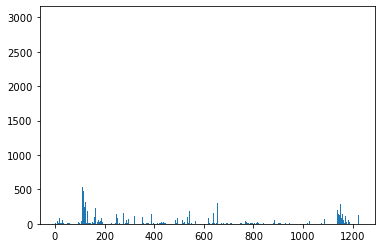

In [36]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [37]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [40]:

# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

KeyboardInterrupt: 

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)